Hi Nadav. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1

Thank you for sending your project. You've done a really good job on it!  While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. Every issue with our code is a chance for us to learn something new. Good luck!

## Review v. 2

All your hard work has paid off, and now your project is perfect! Your project has been accepted and you can go to the next sprint! Good luck on the next sprint!

### Student comment

Hi Svetlana, Thank you for the time and effort pinpointing my project issues, I embrace any comments that can help improve my skills.  

I fixed these issues and added some more analysis parts which I think make the general analysis more robust. 

Nadav

                                        Ice Video Game Store

# Data Analysis for Video Games Sales Predictions 



### Task: Identify patterns that determine whether a game succeeds or not

## Table of Contents

#### **[Step 1. Open the data file and study the general information](#1)**

 [Preliminary Observations](#101)
 
 [Check 0 values](#11)
     
 [Check null values](#12)
 
 [Catagorical variables](#13)
     
 [User scores and Critic scores comparison](#14)
 
  
#### **[Step 2. Data Preprocessing](#2)**
 
 [user score column](#21)
 
 [critic score coulumn](#22)
 
 [Test: replacing missing values with median value](#23)
 
 [rating column](#24)
 
 [year of release column](#25)
 
 [Check preprocessing results](#26)
 
 
#### **[Step 3. Data Analysis](#3)**


 [Games vs. Year of Release](#31)
     - How many games were released in different years?
     - Is the data for every period significant?
     
 [Total_sales vs year of release](#32)
 
 [Sales variations from platform to platform](#33)
 
 [Which platforms are leading in sales?](#34)
 
 [Which platforms are growing or shrinking?](#35)
 
 [Potentially profitable platforms.](#36)
 
 [Boxplot for the global sales of all games, broken down by platform](#37)
    - are the differences in sales significant?
    - What about average sales on various platforms?
 
 [User and professional reviews affect on sales for PS2 platform](#38)
 
 [compare the sales of the same games on other platforms](#39)
  
 [General distribution of games by genre](#310)
    - What can we say about the most profitable genres?
    - Can you generalize about genres with high and low sales? 
 
 [Conclusion for regions analysis](#311)
 
  
#### **[Step 4. User profile for each region](#4)**
 
 [Top five genres for each region](#41)
 
 [Top five platforms for each region](#42)
 
 [Do ESRB ratings affect sales in individual regions?](#43)
 
 [User Profile Summary](#44)
 
#### **[Step 5. Test hypothesis](#5)** 

 [Test 1. The average user ratings of the Xbox One and PC platforms are the same](#51)
 
 [Test 2. The average user ratings for the Action and Sports genres are different.](#52)

     
 **[Step 6. Overall Conclusion](#6)**
 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It’s great that you added a table of contents with links and a goal of the project. 
</div>

<a class="anchor" id="1"></a>

## Step 1. Open the data file and study the general information

<a class="anchor" id="101"></a>
### Preliminary Observations

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from functools import reduce
from scipy import stats as st

import warnings
#if not sys.warnoptions:
#       warnings.simplefilter("ignore")
        

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

# display general info
display(games.head(20))
display(games.describe())
display(games.info())

# show tbd values
display(games.User_Score.value_counts())
display(games[games['User_Score'] == 'tbd'])
display(games.User_Score.unique())

# show rows without null values
games[games.notnull().all(axis = 1)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1.9       2
0.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E


#### Observations 

- The data has 16715 rows, with missing vlaues Critic_Score, User_Score and Rating columns.
- User_Score needs to be replaced from object to float in order to make quantitaive analysis. 
- User score column: most frequent value is 'tbd' with 2424 rows. This is a very significant portion of the data and will have to be treated in the preprocessing.
- There is a lot of missing data at the sales columns. This is noticble especially seeing all columns are characterized by Q1 = 0. 
- About 47% is complete

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded and ready for the further preparation/analysis.
</div>

<a class="anchor" id="11"></a>

### Check for 0 values

In [53]:
# check 0 values in the data

# columns of type float
float_columns = ['NA_sales', 'EU_sales', 'Other_sales', 'Critic_Score']



print('number and prcentage of 0 values in each of the float columns')

for i in float_columns:
    print(i, len(games[games[i] == 0]))
    print(i, '{:.2%}'.format(len(games[games[i] == 0]) / len(games)),'\n')

number and prcentage of 0 values in each of the float columns
NA_sales 4508
NA_sales 26.97% 

EU_sales 5870
EU_sales 35.12% 

Other_sales 6601
Other_sales 39.49% 

Critic_Score 0
Critic_Score 0.00% 



#### Obsevations
Sales columns contain betewwen 25-40% 0f  values. This could be either due to games who were not sold in some areas, or no data availabe.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, reasonable explanation.
</div>

<a class="anchor" id="12"></a>
### Check for null values

In [54]:
#check null values

print('null values:')
print(games.isnull().sum())

print('\nnumber and percentage of null values in each column')
for i in games.columns:
        print (i, len((games[games[i].isnull()])))
        print(i, '{:.2%}'.format(len(games[games[i].isnull()]) / len(games)), '\n')

null values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

number and percentage of null values in each column
Name 2
Name 0.01% 

Platform 0
Platform 0.00% 

Year_of_Release 269
Year_of_Release 1.61% 

Genre 2
Genre 0.01% 

NA_sales 0
NA_sales 0.00% 

EU_sales 0
EU_sales 0.00% 

JP_sales 0
JP_sales 0.00% 

Other_sales 0
Other_sales 0.00% 

Critic_Score 8578
Critic_Score 51.32% 

User_Score 6701
User_Score 40.09% 

Rating 6766
Rating 40.48% 



#### Obsevations
columnes with most amount of missing values are the Critic_Score, User_Score and Rating columns. This is a crucial step for the anlaysis of sales using these caregories.

<a class="anchor" id="13"></a>
### Catagorical variables

In [55]:
# categorial variables
display(games.describe(include = ['object']))

games.Platform.value_counts()


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### Obsevations

* Most of the data is concetrated at the consoles which were released in the last years.
* There are solid representations for both Home gaming consoles (PS2, XBOX etc) and portable consoles (DS, PSP, GBA)

In [56]:
# check unique and duplicated values in name column
display('Unique values in Name column:', games.Name.nunique())
display('Duplicates in Name column:', games.duplicated(subset = 'Name').sum())

# scan the data for quick insights
display(games[games.duplicated(subset = 'Name') == True].head(50))
display(games[games.duplicated(subset = 'Name') == True].describe())


'Unique values in Name column:'

11559

'Duplicates in Name column:'

5155

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,5050.000000,5155.000000,5155.000000,5155.000000,5155.000000,3257.000000
mean,2008.249703,0.217847,0.119723,0.018186,0.040786,69.215229
std,4.786181,0.423440,0.302437,0.087275,0.106652,13.478121
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2005.000000,0.030000,0.010000,0.000000,0.000000,61.000000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,71.000000
75%,2012.000000,0.240000,0.120000,0.000000,0.040000,79.000000
max,2016.000000,9.660000,6.310000,1.810000,1.970000,98.000000


#### Obsevations
There are 5155 duplicates, however, the table suggests it is highly likely that a big portion, if not most of these games are titles which were published on numerous platforms.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it can be  games for different platforms. Please check full duplicates.
</div>

<a class="anchor" id="14"></a>
### User scores and Critic scores comparison

In [57]:
# crate a slice with valid user score column
games_user_scores = games[(games['User_Score'].notnull()) & (games['User_Score'] != "tbd") & (games['User_Score'] != '0')]
user_score_copy = games_user_scores.copy()

# edit user_score column in order to scale the scores with the same metric of critic score
user_score_copy.User_Score = user_score_copy.User_Score.astype('float')
user_score_copy.User_Score = user_score_copy.User_Score * 10


display(user_score_copy['Critic_Score'].describe())
display(user_score_copy['User_Score'].describe())

count    7017.000000
mean       70.249822
std        13.880646
min        13.000000
25%        62.000000
50%        72.000000
75%        80.000000
max        98.000000
Name: Critic_Score, dtype: float64

count    7589.00000
mean       71.25985
std        14.97873
min         2.00000
25%        64.00000
50%        75.00000
75%        82.00000
max        97.00000
Name: User_Score, dtype: float64

#### Obsevations

We see that overll, user scores and critic score show similar values in mean, median and std. We can use this observations to fill missing balues of one of the columns if the the score in the other column is available. 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. Please take it into account for the future. 
</div>

#### Conclusions (after v1)

* There are 30-50% of misssing values numerous columns: user score, critic score and rating. 
* We check for user score and critic score stats and see similar ratings, this will allow us to fill missing values.
* Regional sales column conatins large amount of o sales. This could be either due to data not available or to games not sold in these regions.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok, data is downloaded and ready for the further preparation and analysis.
</div>

<a class="anchor" id="2"></a>
## Step 2. Data Preprocessing

In [58]:
# change column names to lowercase
games.columns = map(str.lower, games.columns)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you bring columns to the lower case. 
</div>

In [59]:
# add total_sales column
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<a class="anchor" id="21"></a>
### user score column

#### 'tbd' values in user_score column:


In [60]:
# comparison: display year_of_release statistics for rows with and without 'tbd' values
# Purpuse: to check if tbd values relates to new games which yet to collect data.
display((games[games.user_score == 'tbd']).year_of_release.describe())        
display(games[games.user_score != 'tbd'].year_of_release.describe())

# len of tbd rows
display(len(games[games.user_score == 'tbd']))

# precentage of the data with tbd values
display(len(games[games.user_score == 'tbd']) / len(games))

# display how many games have 'tbd' values, but have critic scores
display(len(games[(games['user_score'] == 'tbd') & (games['critic_score'].notnull())]))



count    2376.000000
mean     2007.450337
std         3.484229
min      1997.000000
25%      2005.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

count    14070.000000
mean      2006.321535
std          6.175711
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64

2424

0.1450194436135208

1082

#### Obsevations

* the games with 'tbd' value do not show significant difference from the rest of the dataset, as they are only 1 year newer on average compare to the rest of the data. 

* There are 1082 rows with 'tbd' values, where critic score is not null. We alreasy see at the first look of the data that rankings of users and critic tend to be similar. Therfore, in those rows we will fill with critic scores 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, reasonable :)
</div>

6701

6701

0.4008973975471134

Text(0.5, 0, 'User Score')

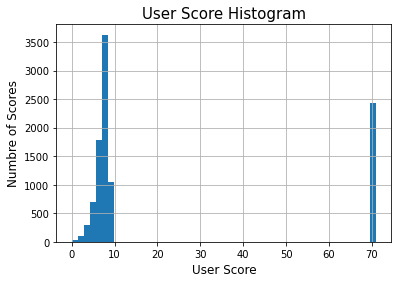

In [61]:
# fill missing values user_score

# number of null values in user_score before filling with critic_score data
display(len(games[games.user_score.isnull()]))

# for games with 'tbd' values, fill with critic_score data
games.user_score = games.user_score.replace('tbd', games.critic_score.median())

# change user_score from str to float
games['user_score'] = games['user_score'].astype('float')

# number of null values in user_score after filling with critic_score data
display(len(games[games.user_score.isnull()]))

# check how much of user_score remaing with null from data
display(len(games[games.user_score.isnull()]) / len(games))

# display histogram
games.hist('user_score', bins = 50)
plt.title("User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("User Score", fontdict = {'size':12})

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
It's great that you didn't forget the title, but please add the axis labels to the graph.
This applies to all other graphs too.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Now graph looks better :)
</div>

#### Obsevations
* There are 48% of the user_score with missing values. Filling them with zero does not make any sense and will completly distort the data. 

* Some of the 'tbd' have been replaced with nan data, as we can see that nan increased from 6701 to 8043

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, 'tbd' is expected to be NaN.
</div>

<a class="anchor" id="22"></a>
### critic score column

array([[<AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

8578

1915

16715

10014

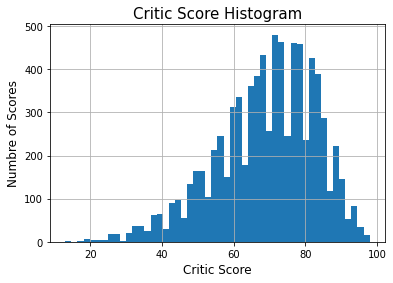

In [62]:
# preliminary ovservations of the data stats and histogram
display(games.hist('critic_score', bins = 50))
plt.title("Critic Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("Critic Score", fontdict = {'size':12})


display(games['critic_score'].describe())

display(len(games[games['critic_score'].isnull()]))

# how many games with null values in critic score, have user_score data - 573
display(len(games[(games['critic_score'].isnull()) &(games['user_score'].notnull())]))

# replace null critic_scores with values from user_score
#games.critic_score = games.critic_score.replace(np.nan, games.user_score * 10)

# new code, upper one not competible in local
games.critic_score = games.critic_score.mask(games.critic_score == 'nan', games.user_score * 10, inplace = True)


display(len(games[games['critic_score'].isnull()]))
display(len(games[(games['critic_score'].isnull()) &(games['user_score'].notnull())]))


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
An excellent graph, but please add labels to the graph.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

<a class="anchor" id="23"></a>
### Test: replacing missing values with median value

In [63]:
# replace missing values with median

# a temp slice for test critic score
games_test1 = games.copy()
games_test1['critic_score_est'] = games_test1['critic_score'].copy()
games_test1['critic_score_est'] = games_test1['critic_score'].fillna(games_test1.groupby(['genre'])['critic_score'].transform('median'))

# a temp slice for test user score
games_test1['user_score_est'] = games_test1['user_score'].copy()
games_test1['user_score_est'] = games_test1.user_score_est.fillna(games_test1['critic_score_est']/10)

# show hist of the new slices
display(games_test1.hist('critic_score_est', bins = 100))
plt.title("Estimated Critic Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("Estimated Critic Score", fontdict = {'size':12})

display(games_test1.hist('user_score_est', bins = 100))
plt.title("Estimated User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("Estimated User Score", fontdict = {'size':12})

# check missing values are filled
print(games_test1.isnull().sum())



DataError: No numeric types to aggregate

#### Conclusion

we see that when trying to fill the missing values with the median by each genre, the resulted histograms are completly distored.
Therfore, it is decided that it's best to keep the missing values as is.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Great that you tried to fill a missing values by median. However, please note that it's also possible to change a missing values to mean, mode, 0 or other values. It depends on our data. 
</div>

#### Student comment: Yes, I agree I could use other values, however it will still distort much of the data as the median


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok, reasonable comment :)
</div>

<a class="anchor" id="24"></a>
### rating column

In [64]:
display(games.rating.value_counts())
display(len(games[games.rating.isnull()]))


games.rating = games.rating.fillna('not available')
display(len(games[games.rating.isnull()]))

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

6766

0

#### Conclusion

rating column has a significant amount of 6766 missing vlaues. However, there is no quantitaive method to fill those values. 
It is decided to fill them with not available str. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, reasonable decision.
</div>

<a class="anchor" id="25"></a>
### year of release column

In [65]:
display(games.year_of_release.unique())
display(games.year_of_release.value_counts())

#games.year_of_release = games.year_of_release.fillna(0)
#games.year_of_release = games.year_of_release.astype('int')

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

#### Conclusion

It is decided to leave missing values as is, in order not to distort the statstical analysis. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please see the following link: https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
</div>

<a class="anchor" id="26"></a>
### Check preprocessing results

In [66]:
# Checking null data after preprocessing
print(games.isnull().sum())

name                   2
platform               0
year_of_release      269
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score       16715
user_score          6701
rating                 0
total_sales            0
dtype: int64


In [67]:
#Checking the distrubions of the processed columns

games_rand = games.sample(2000)


def shapiro(df):
    alpha = 0.05
    parameters = ['critic_score', 'user_score']
    for x in parameters:
        print('For {} parameter'.format(x))     
        result =  st.shapiro(df[x])
        if result[1] > alpha:
            print ('We accept the null, data is normally distributed')
        else:
            print ('We rejact the null, data is not normally distributed')
shapiro(games_rand)



For critic_score parameter


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

#### Conclusion

Even thuogh the histograms are skewed to the left, the distrubion is normal following the shapro test

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you have used Shapiro–Wilk test, but please histograms to see data more clearly.
    
Please see: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

In [68]:
# check notnull values

games[games.notnull().all(axis = 1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


#### Conclusion

* notnull values: 7878 --> 8432 and including the fact that 'tbd' values were replaced (in original, tbd is not considered as a missing value)

* We achieved 9.3% improve of the data

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, lets move to the data analysis.
</div>

<a class="anchor" id="3"></a>
## Step 3: Analyze the Data

<a class="anchor" id="31"></a>
### Games year of release

#### How many games were released in different years?
#### Is the data for every period significant?

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,9,9
1981.0,46,46,46,46,46,46,46,0,0,46,46
1982.0,36,36,36,36,36,36,36,0,0,36,36
1983.0,17,17,17,17,17,17,17,0,0,17,17
1984.0,14,14,14,14,14,14,14,0,0,14,14


Text(0.5, 0, 'Number of games Released')

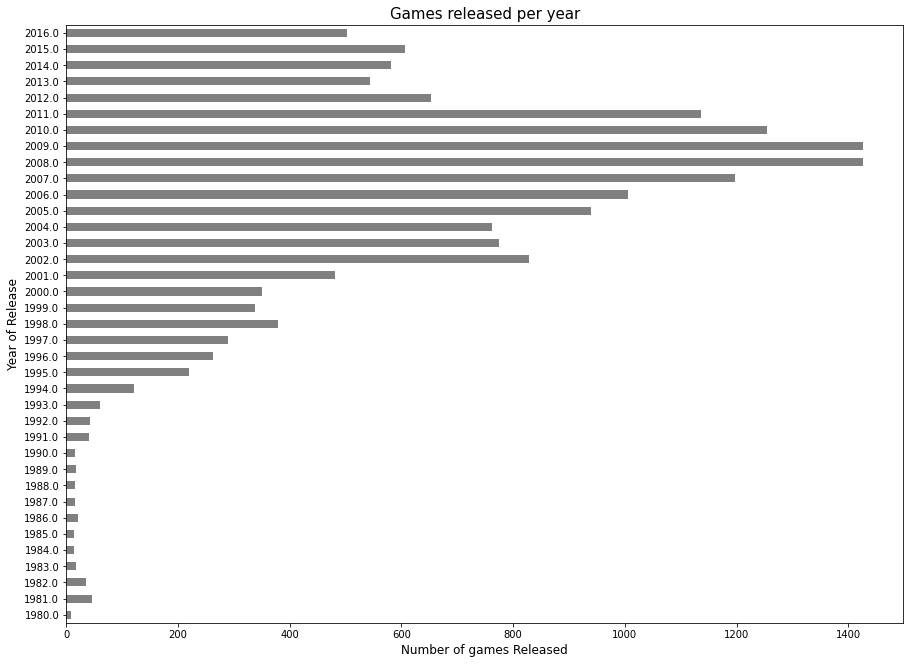

In [69]:
# create a pivot table by years
released_years = games.groupby('year_of_release').count()
display(released_years.head(5))


# create a bar plot of year of released vs. number of games released 
released_years.name.plot(kind = 'barh', color = 'gray', figsize =(15,11));
plt.title("Games released per year", fontdict = {'size':15})
plt.ylabel("Year of Release", fontdict = {'size':12})
plt.xlabel("Number of games Released",  fontdict = {'size':12})


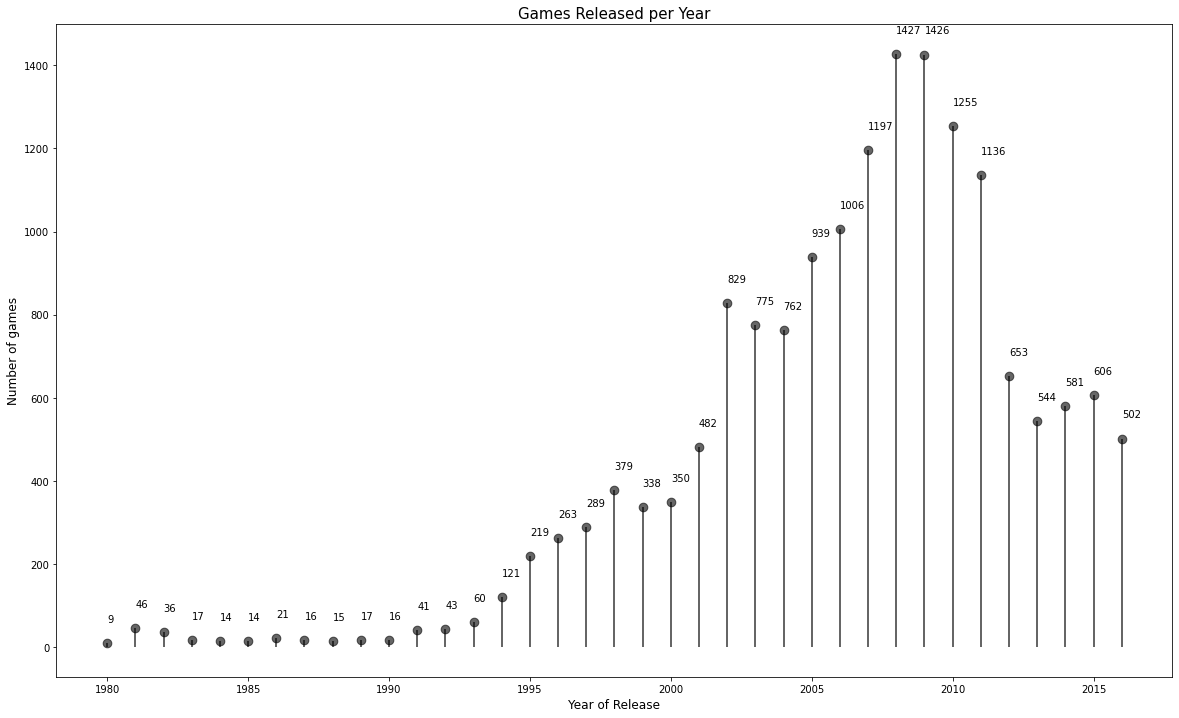

In [70]:
# 2nd option- create a lollipop graph

# create a pivot table by years
released_years2 = games[['year_of_release','name']].groupby('year_of_release').count().reset_index().sort_values('name', ascending = False)
released_years2.columns = ['year_of_release', 'games_released']
released_years2 = released_years2[released_years2['year_of_release']!=0]


# create a lollipop chart for analysis of games released per year
fig,ax = plt.subplots(figsize = (20, 12));
ax.vlines(x = released_years2.year_of_release, ymin = 0, ymax = released_years2.games_released, color = 'black', alpha = 0.6, linewidth = 2);
ax.scatter(x = released_years2.year_of_release, y = released_years2.games_released, s = 75, color = 'black', alpha = 0.6);
ax.set_title('Games Released per Year', fontdict = {'size':15})
ax.set_ylabel('Number of games',  fontdict = {'size':12})
ax.set_xlabel('Year of Release',  fontdict = {'size':12})

for row in released_years2.itertuples():
    ax.text(row.year_of_release, row.games_released+50, s = round(row.games_released,1))

    

#### Conclusion (after v1)

- The graph highlights 2 significant increase periods in games released: 
    * Between the years 2000-2005: correlates with the realease of numerous consoles such as the  PS2, XBOX, GC, ,PSP and 3DS consoles. 
    * Between the years 2006-2011: correlates with the realease of numerous consoles such as the  PS3, XBOX360, WII and 3DS consoles.
    

- Low sales prior to 1995 is a combination of both low market cap for the industry in those years and the lack of sales data.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
An excellent graphs, but could you please describe graphs in more details (main trends and so on)? 

Please note that "Look at how many games were released in different years. Is the data for every period significant?" means you should take into account for the futher analysis only data since definite year. It will be better to use data since 2014. The reason why to chose data since 2014 is the following. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In General, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.
</div>

#### Student comment:  (after v1)

Ok, I agree we should focus on recent years consoles and also wrote it in the conclusions. 
The reason I went for 1997 and forward is because this year and on represent the era of the new generaion consoles (PS, XBOX and forward). As the task asks to predict games success, my interpretation was to study consumer behaviour and preferences. Therefore, I tried to use at much relevant avaialble data as possible. 


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, acceptable variant :)
</div>

<a class="anchor" id="32"></a>
### Total_sales vs year of release

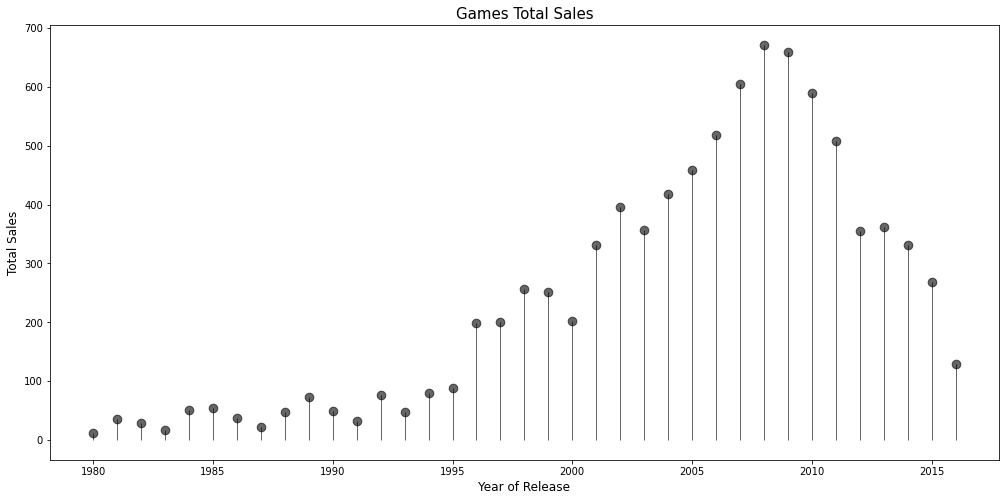

In [71]:
# create a lollipop function, for quick look at data 
def lollipop(axis_x, axis_y):
        fig,ax = plt.subplots(figsize = (17, 8));
        ax.vlines(x = axis_x, ymin = 0, ymax = axis_y, color = 'black', alpha = 0.6, linewidth = 1);
        ax.scatter(x = axis_x, y = axis_y, s = 75, color = 'black', alpha = 0.6);
    

# Test years of release vs total sales
games_sales = games[['year_of_release','total_sales']].groupby('year_of_release').sum().reset_index()
#Test lollipop function on total sales
lollipop(games_sales.year_of_release, games_sales.total_sales)  
plt.title("Games Total Sales", fontdict = {'size':15});
plt.ylabel("Total Sales",fontdict = {'size':12});
plt.xlabel("Year of Release", fontdict = {'size':12});


#### Conclusion

We can see a good correlation to the previous chart. total sales increased with accordance to the amount of games released


####  (after v1)

- Increase in total sales is correlates the release of new consoles to the market. 
- The decrease of games release and number are sales could be explain by changes in market prefernces:
    * Consoles being outdated, as these devices technical caplities can catch up with current market
    * Consumers are on hold waiting for new geneation platforms.
    * Consumers switch to different trends such as mobile gaming.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you didn't forget the axis labels and the title to the graph. Could you please describe a possible reason of increasing and decreasing of the number of games?
</div>

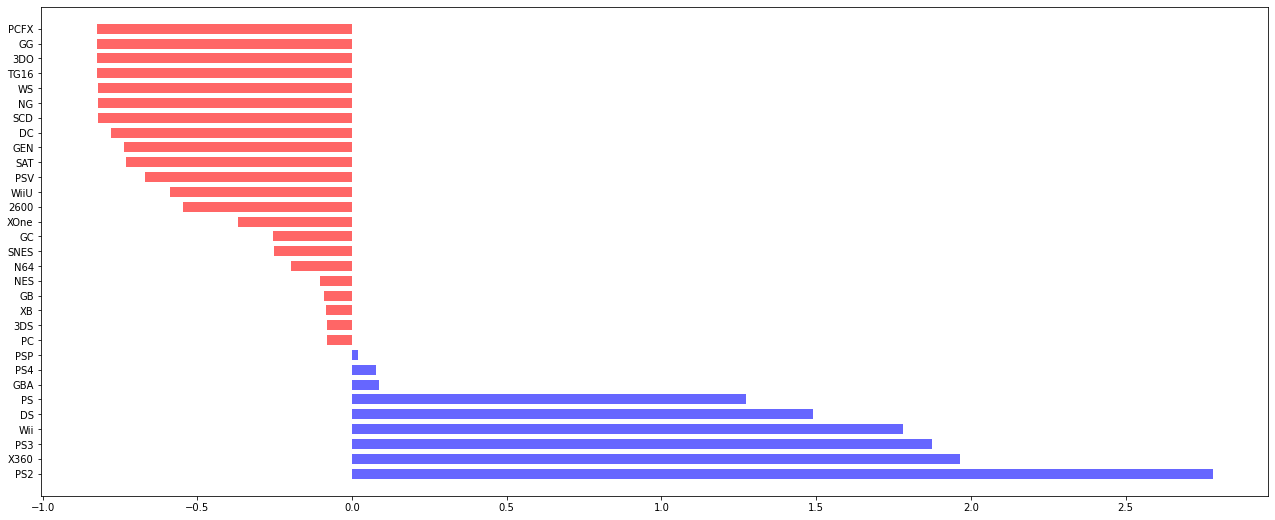

In [72]:
# group the data by platform and sort by total_sales
platform_sales = games[['platform','total_sales']].groupby('platform').sum().sort_values('total_sales', ascending = False).reset_index()

# build z-score in order to see --- 
platform_sales['sales_z'] = (platform_sales['total_sales'] - platform_sales['total_sales'].mean()) / platform_sales['total_sales'].std()
platform_sales['color'] = ['red' if x<0 else 'blue' for x in platform_sales['sales_z']]
platform_sales = platform_sales.sort_values('sales_z', ascending = False)

# plot z-score
plt.figure(figsize = (22,9));
plt.hlines( y = platform_sales.platform , xmin = 0, xmax = platform_sales.sales_z, color = platform_sales.color, alpha = 0.6,linewidth = 10);



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid "<matplotlib.collections.LineCollection at 0x7f790b533290>" by using ";" after code lines with graph.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please describe the most and the least profitable platforms.
</div>

#### Conclusion  (after v1):

- The diverging bar plot shows the the recent consoles are the ones with the highet profit potential.

- The most profitable consoles throught history are the PS2, PS3, Xbox360, Wii, DS, PS.
- The least profitable consoles are irrelevent for the analysis, as most of them are very old. 
- We should be careful when addressing most profitable platforms:
    * They can help us predict future sales as they allows for games data interpretation
    * We can focus on future brands base on these platforms: Sony, Microsoft and Ninentdo. 
    * However, even if some new games are still released to these platforms in some regions, they probably wont gain a lot of sales volume.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right, you correctly defined the most profitable platforms.
</div>

<a class="anchor" id="34"></a>
### Which platforms are leading in sales? 

In [73]:
# slice for tree map, grouped by platform
sales_tree = games[['platform','total_sales']].groupby('platform').sum().sort_values('total_sales', ascending = False).reset_index()
sales_tree = sales_tree[sales_tree['total_sales'] > 2]
display(sales_tree.head())

# prepare the data for plot
sizes = sales_tree.total_sales.values.tolist()
labels = sales_tree.apply(lambda x: str(x[0]) +"\n" + "$" +str(round(x[1])), axis = 1)


,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [74]:
sales_tree

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [75]:
sizes

[1255.7699999999925,
 971.419999999998,
 939.6499999999982,
 907.5099999999959,
 806.119999999985,
 730.8599999999957,
 317.84999999999854,
 314.1399999999991,
 294.0499999999952,
 259.5199999999979,
 258.99999999999864,
 257.7399999999991,
 255.4599999999999,
 251.0499999999999,
 218.67999999999984,
 200.04000000000022,
 198.93000000000066,
 159.32,
 96.98000000000003,
 82.19,
 54.070000000000135,
 33.59000000000002,
 30.770000000000003,
 15.95]

In [76]:
labels

0     PS2\n$1256
1     X360\n$971
2      PS3\n$940
3      Wii\n$908
4       DS\n$806
5       PS\n$731
6      GBA\n$318
7      PS4\n$314
8      PSP\n$294
9       PC\n$260
10     3DS\n$259
11      XB\n$258
12      GB\n$255
13     NES\n$251
14     N64\n$219
15    SNES\n$200
16      GC\n$199
17    XOne\n$159
18     2600\n$97
19     WiiU\n$82
20      PSV\n$54
21      SAT\n$34
22      GEN\n$31
23       DC\n$16
dtype: object

You should consider upgrading via the '/anaconda3/bin/python -m pip install --upgrade pip' command.


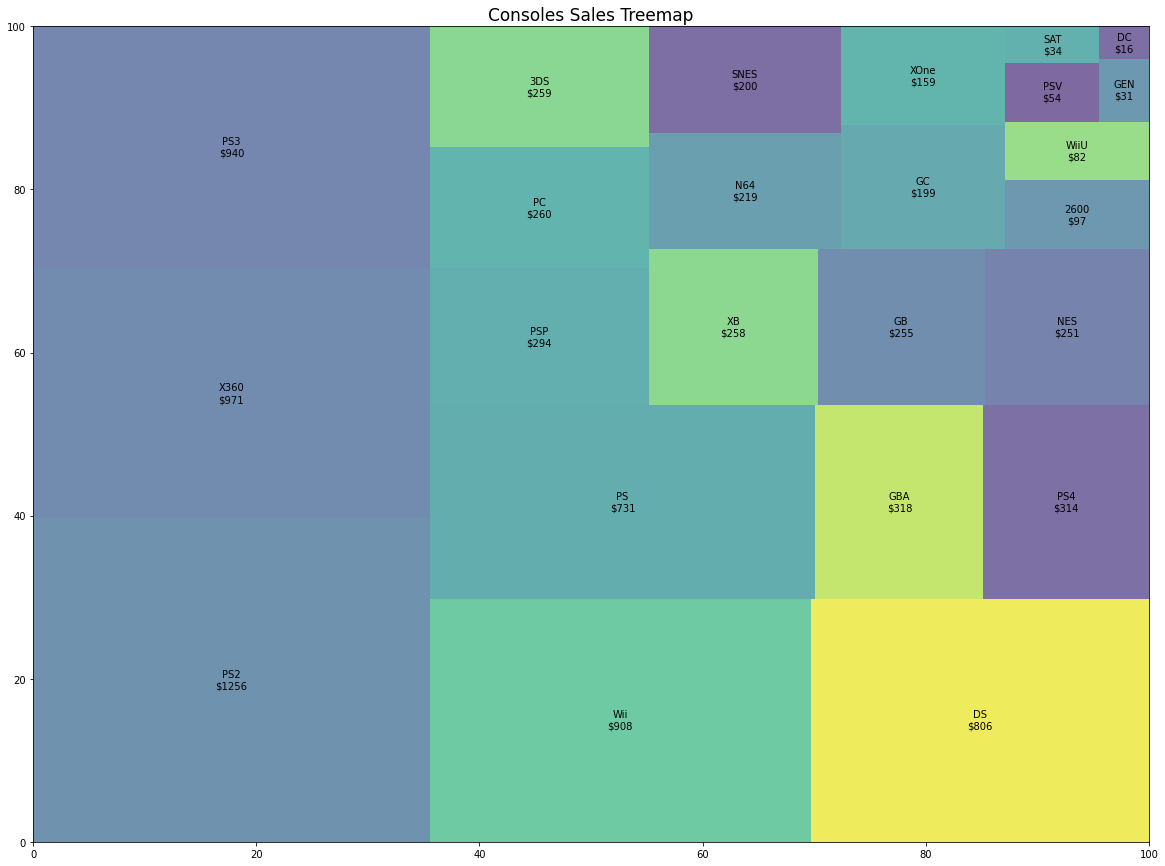

In [77]:
!pip3 install squarify
import squarify as sq

# plot tree map
plt.figure(figsize = (20,15))
sq.plot(sizes = sizes , label = labels, alpha = 0.7);
plt.title("Consoles Sales Treemap", fontdict = {'size':17});

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
An excellent graph, heatmap is suitable type of the graph here. Could you please analyse data clearly (compare platforms)?
</div>

#### Conclusion (after v1)


- We see that sales are dominated by home gaming consoles: The top 4 out of 6 most sold consoles are PS2, XBOX 360m PS3, WII (1-4) and PS (6). 


- We see significant sales also in portable consoles: DS, 3DS and PSP.

- The heatmap shadows the potentinal new platforms: Xbox One and PS4, but it gives us a strong prediction that these will be the leading consoles, as they are the successors of the most sold consoles.


- While Sony PS2 completely dominated the market compare to its direct rivels at the time (XBOX and GC), We see that in the newer generations the gap was closed and even revereasd at the next generaion: 
   * Ninendo Wii significantly surpased the sales of PS3 and Xbox 360
   * Xbox 360 has slightly more sales then the PS3.
   
   
- Digging into the analysis, The PS2 was release during mid 2000, while its rivels - the X-Box and Game Cube - were released in late 2001. This could be a major factor for PS2 success. This gap in release date for consoles was then closed in the next generations, and could explain how Microsoft and Ninendo caught up with Sony. For future predicions - we should check release datas of future consoles.
   

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great analysis :)
</div>

<a class="anchor" id="35"></a>
### Which platforms are growing or shrinking?

In [78]:
# create a new data slice for data interpretation. 
# The year 1997 was chosen in order not to lose data of PS games, which we can see have a considirable amount of total_sales
games_new = games[games['year_of_release'] > 1997]

# pivot table for expension/shrinking analysis
games_new_pivot = games_new.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum', fill_value = 0)

display(games_new_pivot)

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1998.0,0.00,3.38,0.00,26.90,0.00,0.00,49.24,3.26,169.49,0.00,...,0.00,0.00,3.82,0.22,0.00,0.00,0.00,0.00,0.00,0.00
1999.0,0.00,5.16,0.00,38.00,0.00,0.00,57.87,4.74,144.53,0.00,...,0.00,0.00,0.09,0.26,0.46,0.00,0.00,0.00,0.00,0.00
2000.0,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,...,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001.0,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,...,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002.0,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003.0,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004.0,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,...,7.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005.0,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,...,43.84,0.00,0.00,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006.0,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,...,55.32,0.00,0.00,0.00,0.00,137.15,0.00,51.62,10.04,0.00


In [79]:
# create a new df with the difference in sales in each year for each of the platforms
dynamic = games_new_pivot - games_new_pivot.shift(+1)
dynamic

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,0.00,1.78,0.00,11.10,0.00,0.00,8.63,1.48,-24.96,0.00,...,0.00,0.00,-3.73,0.04,0.46,0.00,0.00,0.00,0.00,0.00
2000.0,0.00,0.83,0.00,-18.24,0.07,0.00,-23.90,-0.08,-48.16,39.17,...,0.00,0.00,-0.09,-0.26,0.22,0.00,0.00,0.00,0.99,0.00
2001.0,0.00,-4.92,0.00,-10.52,61.46,26.34,-30.72,0.81,-60.78,127.26,...,0.00,0.00,0.00,0.00,-0.40,0.00,0.00,0.00,21.27,0.00
2002.0,0.00,-0.78,0.00,-9.24,12.63,25.47,-3.17,3.10,-28.92,38.95,...,0.00,0.00,0.00,0.00,-0.28,0.00,0.00,0.00,25.75,0.00
2003.0,0.00,-0.29,0.00,0.00,-17.49,-1.20,-0.08,0.27,-4.60,-21.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.03,0.00
2004.0,0.00,0.00,17.27,0.00,21.24,-21.79,0.00,1.55,-2.07,27.50,...,7.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.38,0.00
2005.0,0.00,0.00,112.87,0.00,-44.05,-1.20,0.00,-6.02,0.00,-51.15,...,36.78,0.00,0.00,0.00,0.00,0.00,0.00,8.25,-16.34,0.00
2006.0,0.00,0.00,-10.33,0.00,-28.58,-16.36,0.00,-1.52,0.00,-57.24,...,11.48,0.00,0.00,0.00,0.00,137.15,0.00,43.37,-39.04,0.00


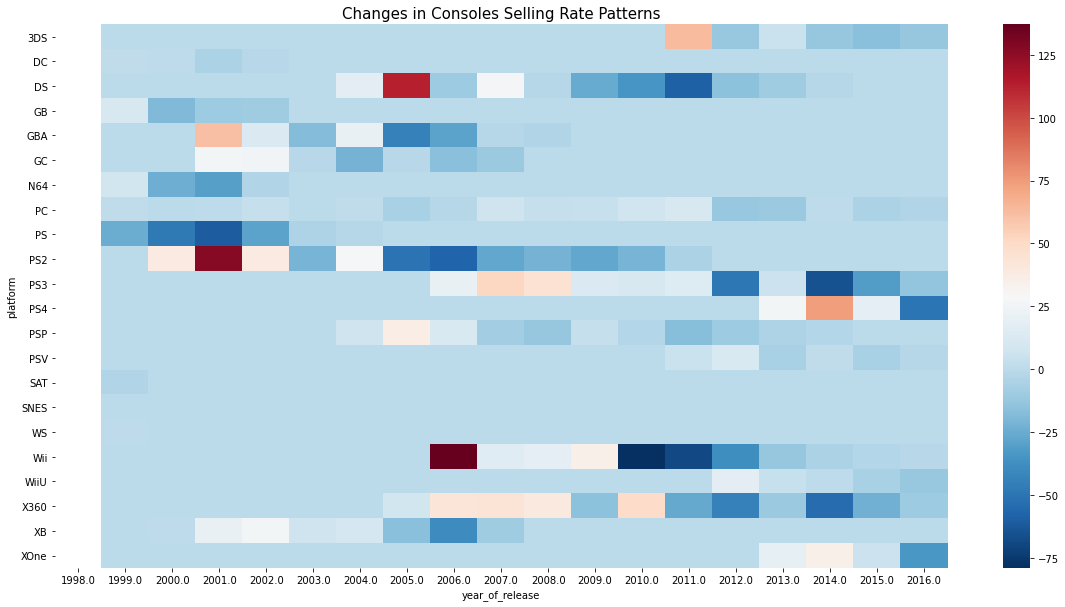

In [80]:
# show the results on a heatmap to see which shrinking/expension periods and their volumes
plt.figure(figsize = (20,10))
sns.heatmap(dynamic.T, cmap = 'RdBu_r');
plt.title("Changes in Consoles Selling Rate Patterns", fontdict = {'size':15});

#### Conclusions

* we can see on the heatmap that during 2005-2009 were strong years for 3 consoles - PS3, XBOX360 nad WII. These are all flagships consoles for Sony, Microsoft and Ninentedo. 
* This expension observation correlates well with the increase of games released between these years, especially when adding the popular Ninetnedo DS.
* These 4 consoles are also comes in place 2-5 in terms of game released (PS2 is still the king)


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent graph and data analysis :)
</div>

<a class="anchor" id="36"></a>
### Potentially profitable platforms


#### Conclusion

* The platforms with higest potetinial according to the expension heat map and the tree graph are the home-gaming consoles: The Sony PS series, Microsoft Xbox and Ninentedi Wii. 
* It is important to consider that current days popular consoles such as PS4 and XOne still didn't reach their peak total sales.
* We see good number also on portable platforms such as DS, 3DS and PSP. However, they represent a smaller market. 
* In order to address the most relevant data, it is decided to drop less relevant consoles: WS, SAT, SNES and DC



In [81]:
# clear all of those with 0 expansion: WS, SNES, SAT, DC, 
games_new = games_new[(games_new['platform'] != 'SNES') & (games_new['platform'] != 'WS') & (games_new['platform'] != 'SAT') & (games_new['platform'] != 'DC')] 


<a class="anchor" id="37"></a>
### Boxplot for the global sales of all games, broken down by platform. 

##### Are the differences in sales significant?
##### What about average sales on various platforms? 

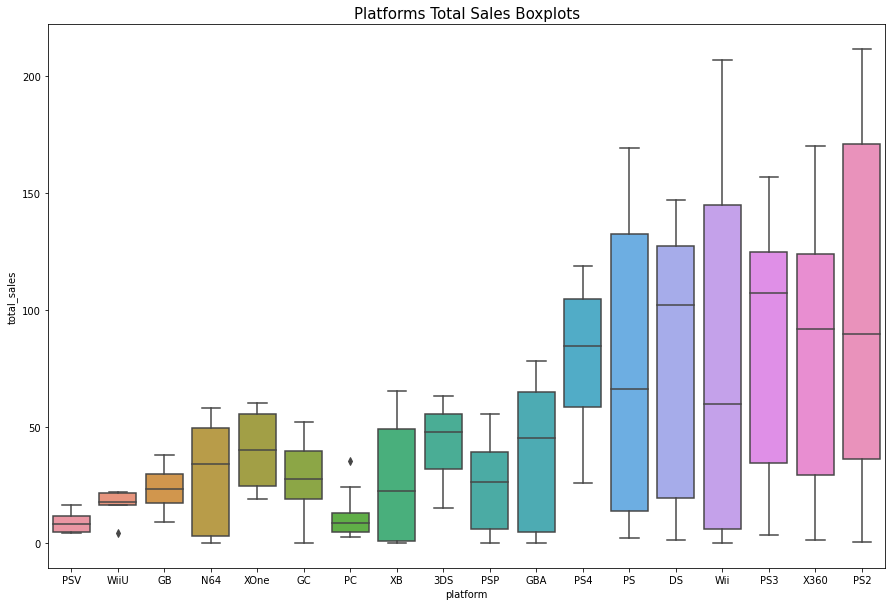

In [95]:
#
platform_sales = games_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_sales_ordered = platform_sales.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

#
plt.figure(figsize = (15,10))
sns.boxplot(x = 'platform', y = 'total_sales', data = platform_sales, order = platform_sales_ordered);
plt.title("Platforms Total Sales Boxplots", fontdict = {'size':15});

In [96]:
platform_sales

,platform,year_of_release,total_sales
0,3DS,2011.0,63.20
1,3DS,2012.0,51.36
2,3DS,2013.0,56.57
3,3DS,2014.0,43.76
4,3DS,2015.0,27.78
...,...,...,...
146,XB,2008.0,0.18
147,XOne,2013.0,18.96
148,XOne,2014.0,54.07
149,XOne,2015.0,60.14


In [97]:
platform_sales_ordered

0      PSV
1     WiiU
2       GB
3      N64
4     XOne
5       GC
6       PC
7       XB
8      3DS
9      PSP
10     GBA
11     PS4
12      PS
13      DS
14     Wii
15     PS3
16    X360
17     PS2
Name: platform, dtype: object

In [98]:
#
display(platform_sales.groupby('platform')['total_sales'].mean().sort_values(ascending = False))
display(platform_sales.groupby('platform')['total_sales'].median().sort_values(ascending = False))

platform
PS2     102.796667
PS3      84.667273
Wii      81.016364
DS       80.276000
X360     80.103333
PS4      78.535000
PS       75.786667
3DS      42.968333
XOne     39.830000
GBA      39.110000
N64      28.882000
GC       28.104286
XB       27.952222
PSP      24.127500
GB       23.475000
WiiU     16.438000
PC       11.248421
PSV       8.968333
Name: total_sales, dtype: float64

platform
PS3     107.360
DS      102.280
X360     91.995
PS2      89.705
PS4      84.625
PS       65.980
Wii      59.650
3DS      47.560
GBA      45.265
XOne     40.110
N64      33.970
GC       27.620
PSP      26.185
GB       23.330
XB       22.260
WiiU     17.560
PC        8.840
PSV       8.420
Name: total_sales, dtype: float64

#### Conclusion:

* Different in sales are signicficant. The new generation consoles - PS2, PS3, PS4, XBOX360 and DS - are chacterized by high median total sales per year of 75M and above. These platforms are also charcterized with similar average values, meaning there is no concern for major outliars. 

* Games are also Games released for these platforms have a higher potentintal for big sales. 



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you plotted boxplot and described outliers in details.
</div>

<a class="anchor" id="38"></a>
### User and professional reviews affect on sales for PS2 platform

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.



In [99]:
display(games_new.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,None,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,None,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,None,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,None,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,None,6.6,E,28.91


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,user_score,total_sales
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,1456.000000,2127.000000
mean,2004.583921,0.269356,0.156385,0.064664,0.089549,17.897596,0.579953
std,2.567689,0.576756,0.360514,0.199480,0.340936,23.394286,1.138461
min,2000.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000
25%,2002.000000,0.010000,0.010000,0.000000,0.000000,7.300000,0.080000
50%,2005.000000,0.090000,0.050000,0.000000,0.020000,8.300000,0.230000
75%,2007.000000,0.250000,0.140000,0.030000,0.070000,8.900000,0.560000
max,2011.000000,9.430000,5.490000,3.610000,10.570000,71.000000,20.810000


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,None,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,None,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,None,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,None,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,None,8.5,E,11.65


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,user_score,total_sales
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,2002.400000,6.938000,3.100000,0.830000,4.468000,8.620000,15.33600
std,1.516575,2.440107,2.669195,0.659811,4.324774,0.238747,3.51239
min,2001.000000,3.010000,0.010000,0.300000,1.160000,8.400000,11.65000
25%,2001.000000,6.850000,0.400000,0.410000,1.300000,8.500000,13.10000
50%,2002.000000,6.990000,4.510000,0.470000,1.780000,8.500000,14.97000
75%,2004.000000,8.410000,5.090000,1.100000,7.530000,8.700000,16.15000
max,2004.000000,9.430000,5.490000,1.870000,10.570000,9.000000,20.81000


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,None,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,None,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,None,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,None,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,None,8.5,E,11.65
84,Final Fantasy X,PS2,2001.0,Role-Playing,2.91,2.07,2.73,0.33,None,8.7,T,8.04
102,Need for Speed Underground,PS2,2003.0,Racing,3.27,2.83,0.08,1.02,None,8.6,E,7.20
113,Need for Speed Underground 2,PS2,2004.0,Racing,2.71,3.02,0.08,1.09,None,8.6,E,6.90
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,2.93,2.75,0.17,0.99,None,8.5,T,6.84
132,Kingdom Hearts,PS2,2002.0,Role-Playing,3.64,1.20,1.49,0.07,None,8.8,E,6.40


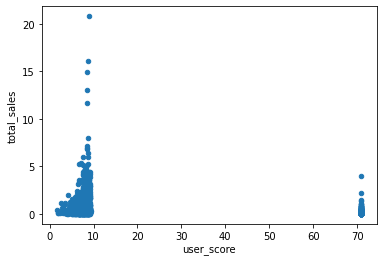

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

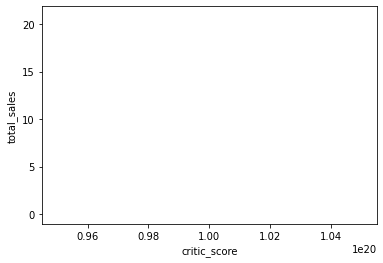

<AxesSubplot:>

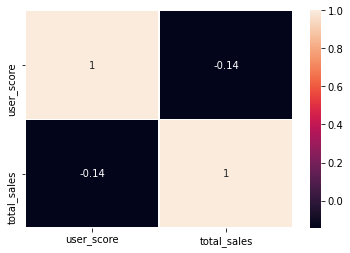

In [100]:
## build a function that recives a platform name, ang group by ranking for critic, and user 


#
games_ps2 = games_new[games_new['platform'] == 'PS2']
display(games_ps2.describe())

#
display(games_ps2[games_ps2['total_sales'] > 10])
display(games_ps2[games_ps2['total_sales'] > 10].describe())
display(games_ps2.sort_values('total_sales', ascending = False).head(20))


#
def reviews_scatter(platform):
    plt.show()
    platform.plot(x = 'user_score', y = 'total_sales', kind = 'scatter')
    plt.show()
    display(platform.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter'))
    plt.show()
    display(sns.heatmap(games_ps2[['user_score','critic_score','total_sales']].corr(), annot = True, linewidth = 0.1))


#
reviews_scatter(games_ps2)




#### Analysis

* The scatter plots of both critic and user scores show similar patterns, where there is partial correlation between games with higher sales and higher scores. 
* At critic_score > 80 we can see a cloud of games with higher sales.
* However, we can see that at the range of user_score of 60-70, there are games with much higher sales then many of the games who scored >80. 

* The correlation table shows that critic scores has a higher relation with total_sales then user scores.
* There is a strong connection between users and critic scores.

* The mean for top 20 selling games is much higher then of the overall in both critic and users scorees: 94.2 and 8.62, compare to 68.8 and 7.48, respectively.

* We look at the top 20 higher sales and see other possibilites for successful sales prediction:

- The top 5 sales belongs to 2 games: GTA and GT. Both show high sales at NA, Europe and Other countries excluding Japan. These games 


- Many of the top 20 games with most sales are sequences of very succesfful serieses, some date back 20 years back (MGS, FF, GTA, GT, MoH, Crash Bandicoot, Dragon Quest). This show that users stay loyal to these games. 

- Japan market behaves different then the rest. The top sales are of RPG genre, highly noticable is the exclusive FF series.  

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we have correlation between variables. Please note that correlation function shows only linear dependecy between variables.
    
Maybe this link will be interesting for you: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.
</div>

<a class="anchor" id="39"></a>
### compare the sales of the same games on other platforms

#### To answer this question, useing the same type of analysis methods on the other platforms

In [101]:
# boxplot, same as before but with genres instead of platforms, we should look at median / mean

Wii Console Total Sales Analysis:


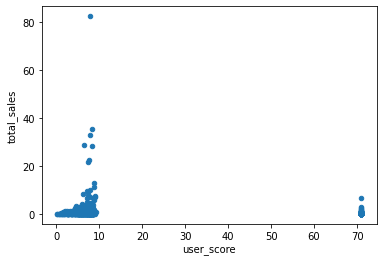

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

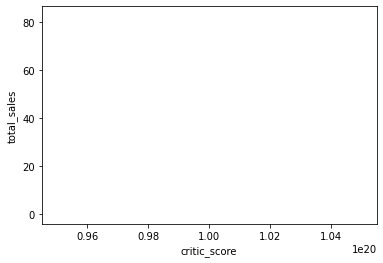

<AxesSubplot:>

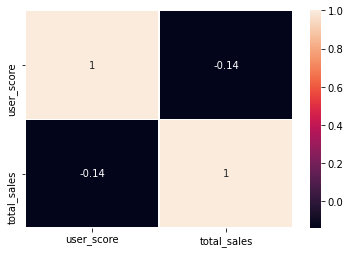

DS Console Total Sales Analysis:


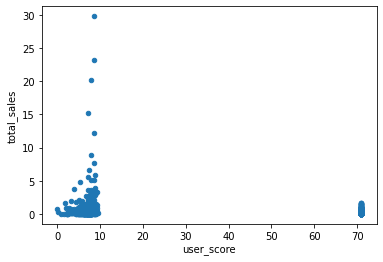

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

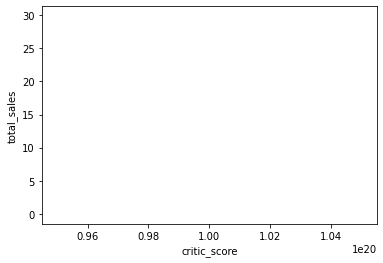

<AxesSubplot:>

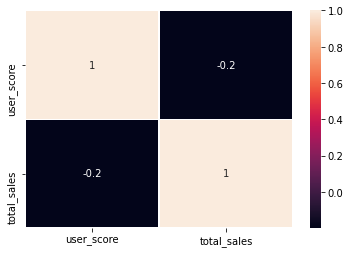

GB Console Total Sales Analysis:


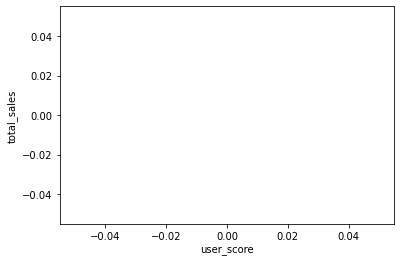

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

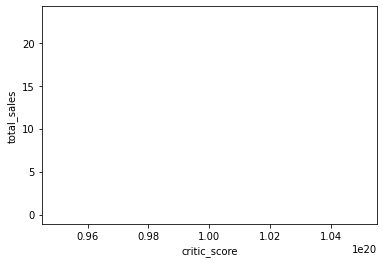

<AxesSubplot:>

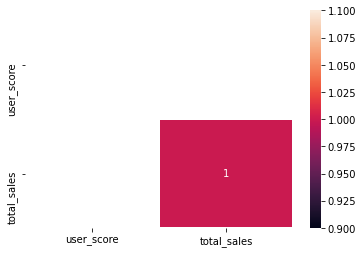

X360 Console Total Sales Analysis:


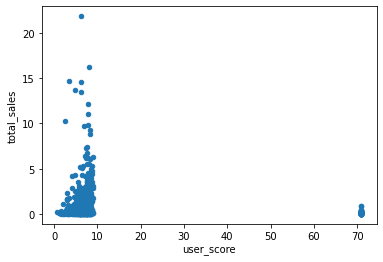

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

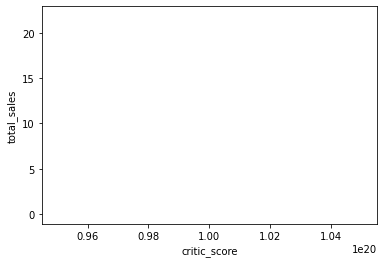

<AxesSubplot:>

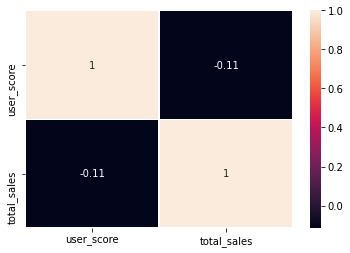

PS3 Console Total Sales Analysis:


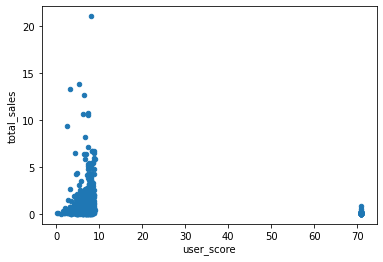

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

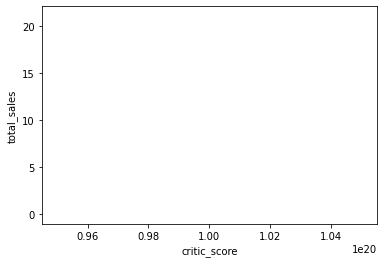

<AxesSubplot:>

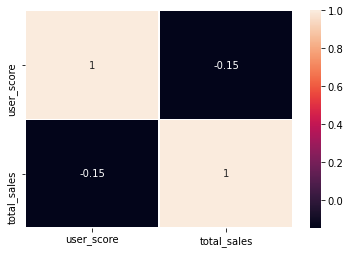

PS2 Console Total Sales Analysis:


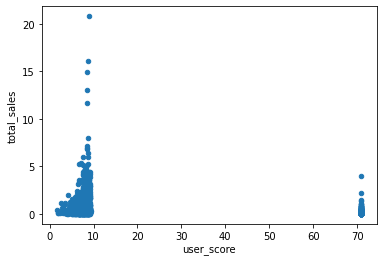

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

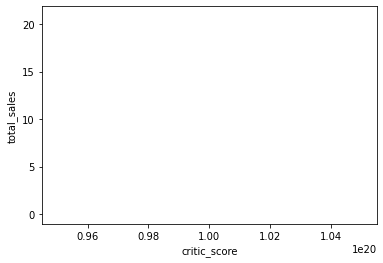

<AxesSubplot:>

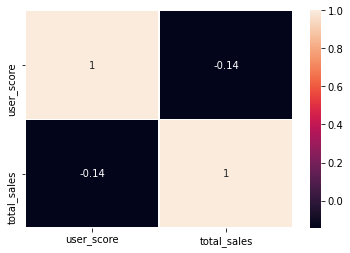

GBA Console Total Sales Analysis:


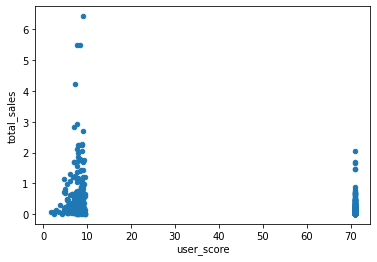

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

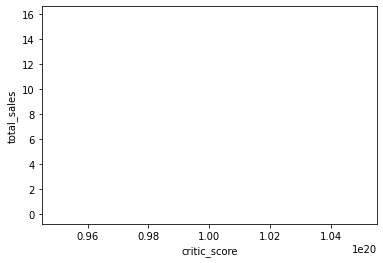

<AxesSubplot:>

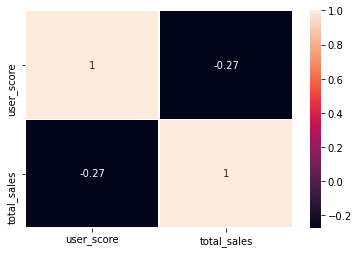

PS4 Console Total Sales Analysis:


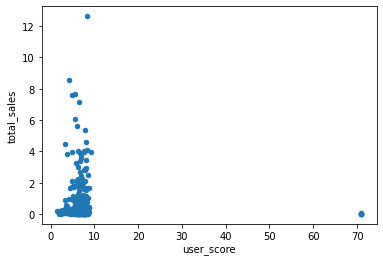

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

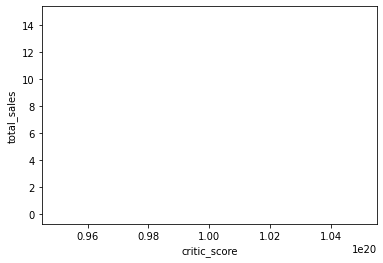

<AxesSubplot:>

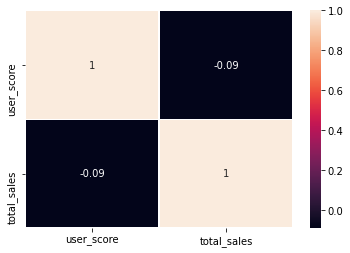

3DS Console Total Sales Analysis:


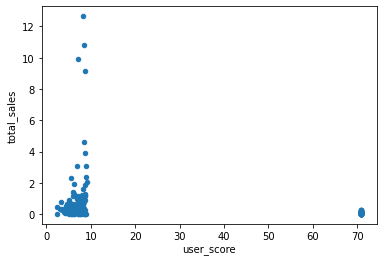

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

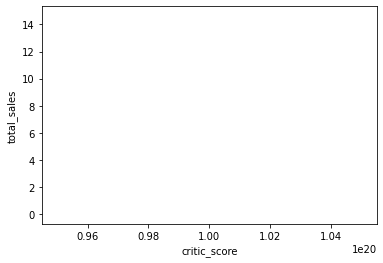

<AxesSubplot:>

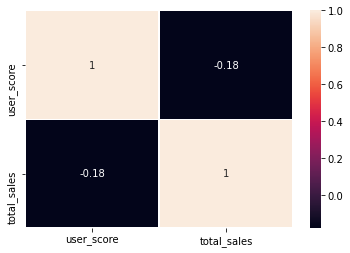

PS Console Total Sales Analysis:


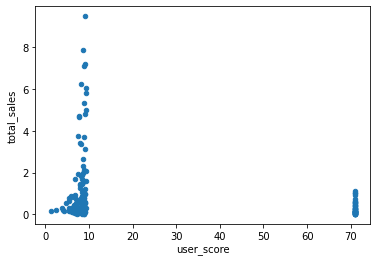

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

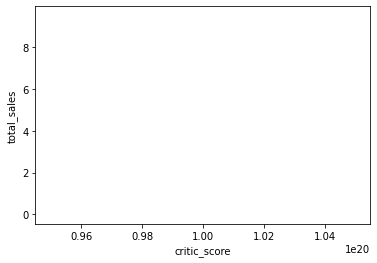

<AxesSubplot:>

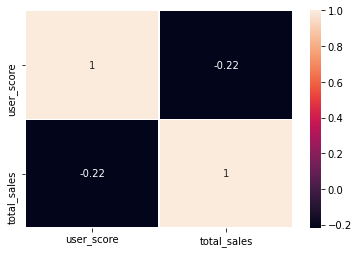

XB Console Total Sales Analysis:


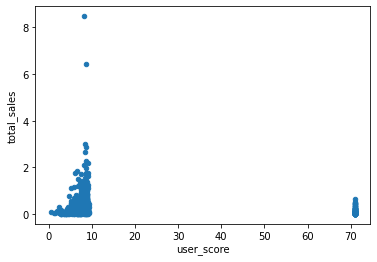

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

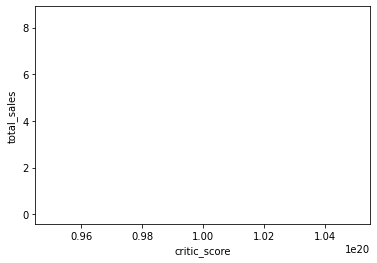

<AxesSubplot:>

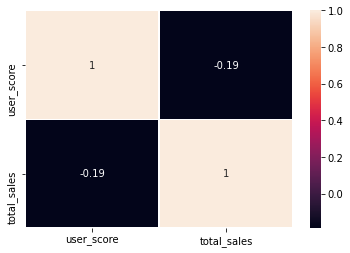

PC Console Total Sales Analysis:


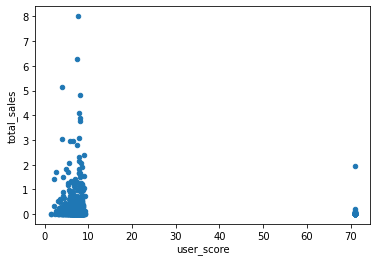

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

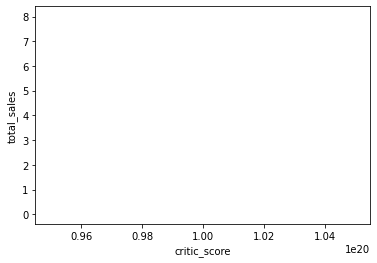

<AxesSubplot:>

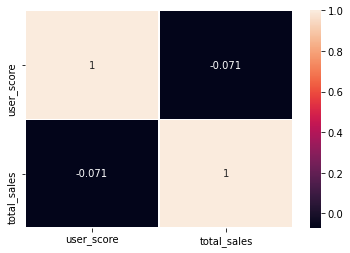

PSP Console Total Sales Analysis:


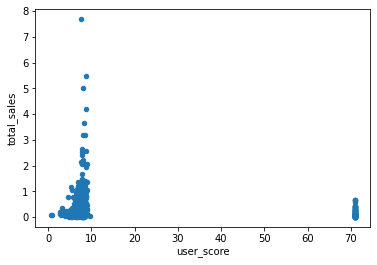

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

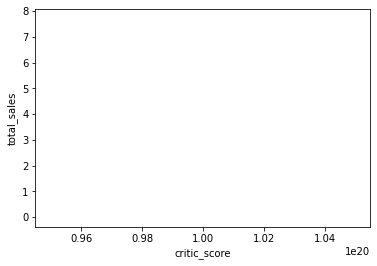

<AxesSubplot:>

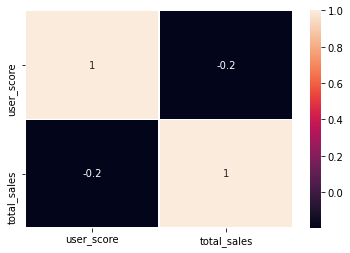

N64 Console Total Sales Analysis:


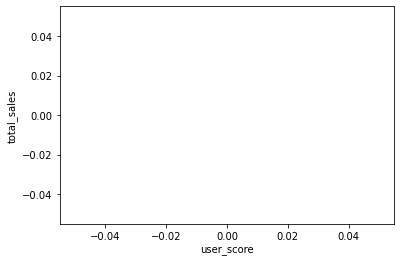

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

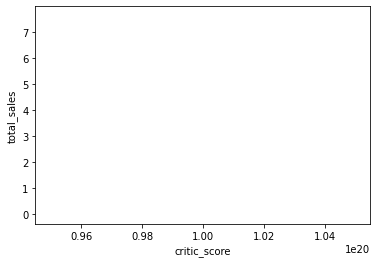

<AxesSubplot:>

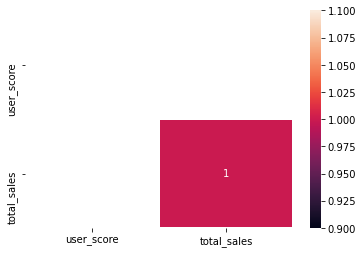

XOne Console Total Sales Analysis:


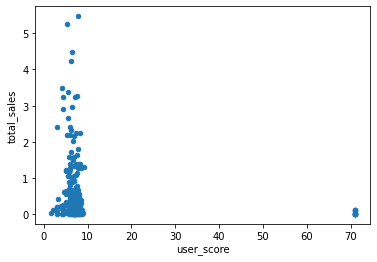

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

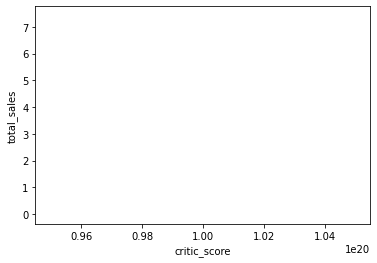

<AxesSubplot:>

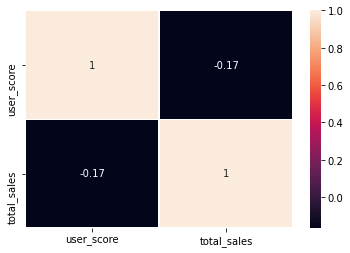

WiiU Console Total Sales Analysis:


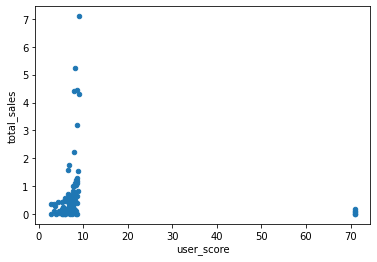

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

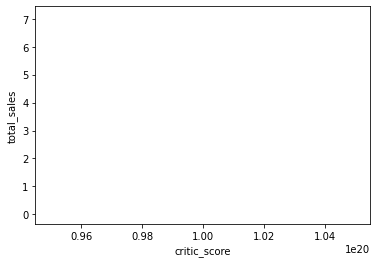

<AxesSubplot:>

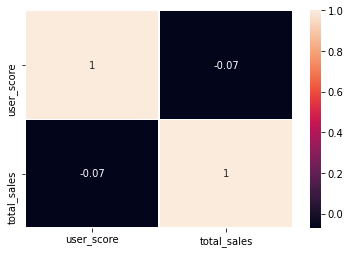

GC Console Total Sales Analysis:


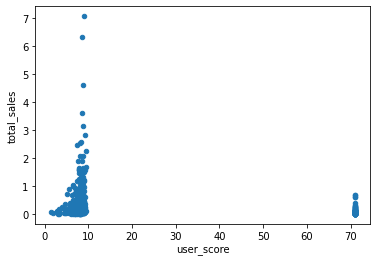

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

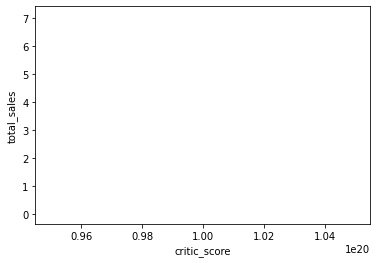

<AxesSubplot:>

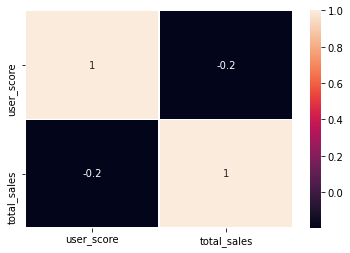

PSV Console Total Sales Analysis:


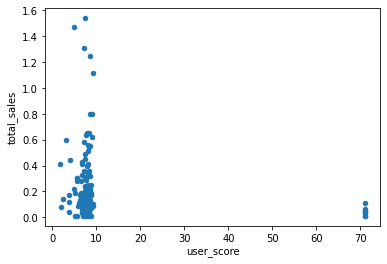

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

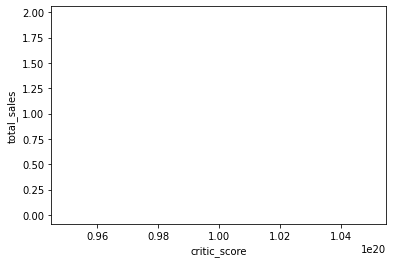

<AxesSubplot:>

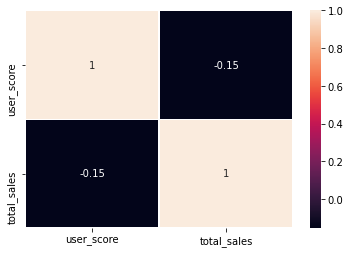

In [102]:
platforms = games_new['platform'].unique()   

#
def reviews_scatter_by_platform(platform):
    print('{} Console Total Sales Analysis:'.format(i))
    platform_slice = games_new[games_new['platform'] == platform]
    plt.show()
    platform_slice.plot(x = 'user_score', y = 'total_sales', kind = 'scatter')
    plt.show()
    display(platform_slice.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter'))
    plt.show()
    display(sns.heatmap(platform_slice[['user_score','critic_score','total_sales']].corr(), annot = True, linewidth = 0.1))
    plt.show()
    
for i in platforms:
    reviews_scatter_by_platform(i)
    

#### Analysis

* we can see that in most of the consoles, the most sold games, which are games that are at the upper half of the sales column, are charcterized by critic score highet then 70.
* The big hits with the most sales are generally characterized by even higher critic scores of 80 and above.
* The is a weak to moderate positive correlation between critic scores and total_sales.
* There is no correlation or non-linear correlation between user_scores and total_sales. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Could you please clarify "There is no correlation or non-linear correlation between user_scores and total_sales.". Please note that correlation function shows only linear dependency between variables.
</div>

<a class="anchor" id="310"></a>
### General distribution of games by genre. 
#### What can we say about the most profitable genres? 
#### Can you generalize about genres with high and low sales?

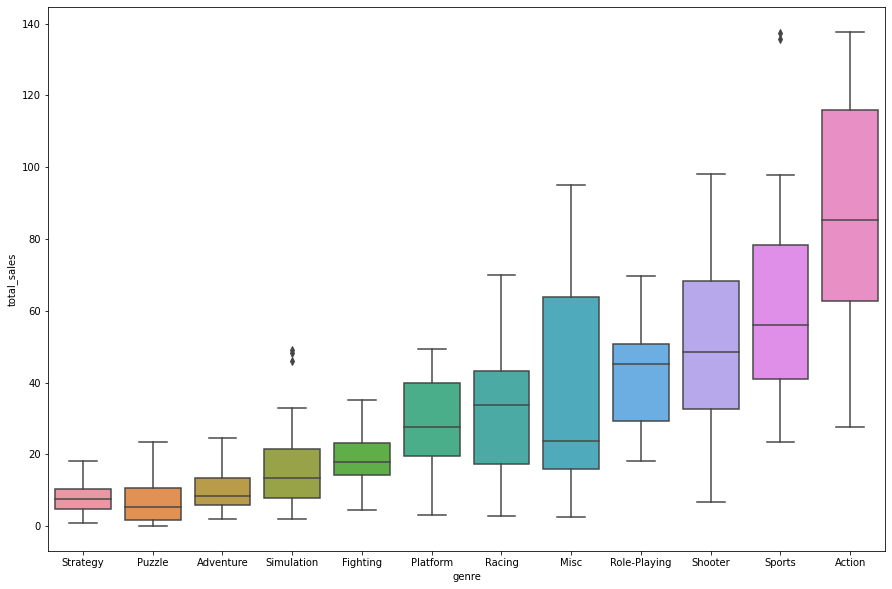

In [103]:
# create a data slice for genre, year of release and total sales
genre_sales = games_new.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()
genre_sales_ordered = genre_sales.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']

# plot genre vs. total sales
plt.figure(figsize = (15,10))
sns.boxplot(x = 'genre', y = 'total_sales', data = genre_sales, order = genre_sales_ordered);



#### What can we say about the most profitable genres? 
* We can see that the most profitable genres are the Action, Sports, and Shooter.
* Misc has a similar Q3 value as Shooter, however, it's median located at the bottom of the bar suggests that the upper values are exceptional hits.
* The median of RPG games show that this genre sales are usually high, with a median of about 40m. 


#### Can you generalize about genres with high and low sales?
I would generlize: 
* Low sales: Niche genres such as Strategy, Puzzle, Adventure, Simulation ang Fighting
* High sales: Popular genres: Action, Sports, Shooter, RPG, Misc, Racing, Platform

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly defined the most profitable genres. Could you please explain these preferences?
</div>

<a class="anchor" id="311"></a>
### Conclusion for regions analysis

#### Since we are dealing with predictions for high sellers, we will cut the data for the popular genres:


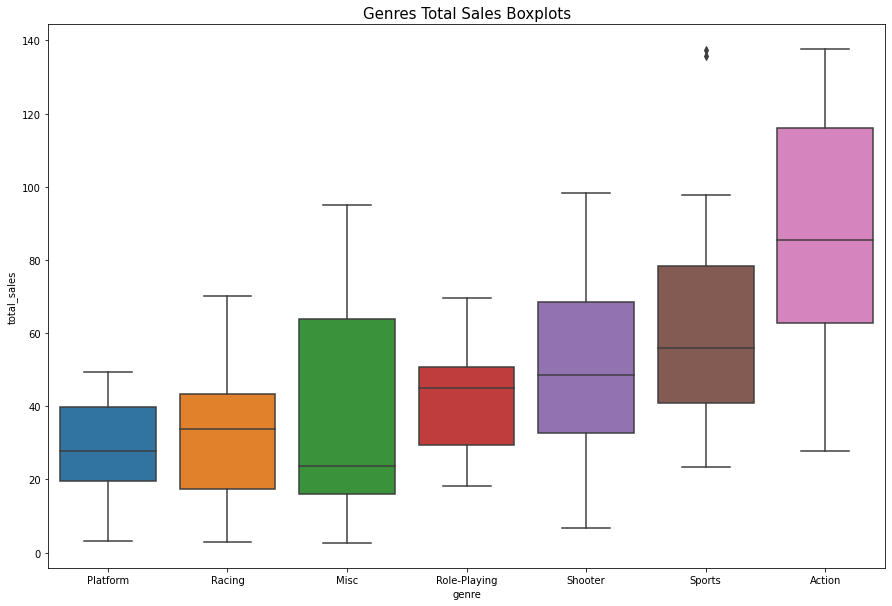

In [104]:
# filter - leave only the successful genres
games_new = games_new[(games_new['genre'] == 'Action') | (games_new['genre'] == 'Sports') | (games_new['genre'] == 'Shooter') | (games_new['genre'] == 'Role-Playing')| (games_new['genre'] == 'Misc') | (games_new['genre'] == 'Racing')  | (games_new['genre'] == 'Platform')]


# view of the new fileted data
genre_sales = games_new.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()
genre_sales_ordered = genre_sales.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()['genre']
plt.figure(figsize = (15,10))
sns.boxplot(x = 'genre', y = 'total_sales', data = genre_sales, order = genre_sales_ordered);
plt.title("Genres Total Sales Boxplots", fontdict = {'size':15});

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add conclusion for this part.
</div>

#### Conclusions (after v1)


- Action genre outperforms all other genres in sales, with median sales almost double than the next leading genres.
- Sports and Shooter genres show similar behaviour: good sales with stable median.
- Misc has a very extreame pattern of low sales (median close to Q1 value), but this also means it is characterized by some very successful games with potential for big sales numbers. 
- We see the median of RPG located the the upper part of the boxplot, meaning games in this genre performs well even though they have lower sales. This could be not only due to consumer perfrences but also to the volume of games released. For exmaple, it might be easier to predict potentially succseful games in this genre than the others.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made a really great analysis.
</div>

#### Additional analysis following v1

In [ ]:
print('Amount of Action, RPG and Misc games portion')
print('Action: {:.1%}'.format(len(games_new[games_new['genre'] == 'Action']) / len(games_new)))
print('Role-Playing {:.1%}'.format(len(games_new[games_new['genre'] == 'Role-Playing']) / len(games_new)))
print('Misc {:.1%}'.format(len(games_new[games_new['genre'] == 'Misc']) / len(games_new)))

print('\nAction, RPG and Misc genre sales portions')
print('Action: {:.1%}'.format((games_new[games_new['genre'] == 'Action']).total_sales.sum() / games_new.total_sales.sum()))
print('Role-Playing: {:.1%}'.format((games_new[games_new['genre'] == 'Role-Playing']).total_sales.sum() / games_new.total_sales.sum()))
print('Misc: {:.1%}'.format((games_new[games_new['genre'] == 'Misc']).total_sales.sum() / games_new.total_sales.sum()))

#### Conclusions (after v1)

Overall, we see that for each of the inspected genre,  total sales correlates with the amount of games released.

<a class="anchor" id="4"></a>
## Step 4. User profile for each region

For each region (NA, EU, JP), determine:
* The top five platforms. Describe variations in their market shares from region to region.
* The top five genres. Explain the difference.
* Do ESRB ratings affect sales in individual regions?

<a class="anchor" id="41"></a>
### Top five genres for each region

In [ ]:
# create a region series for the differen regions
regions = ['na_sales','eu_sales','jp_sales','other_sales']

# create a genre series for the the different platgorms
games_new_genre = games_new.genre.unique()


# Calculate the sale precentage of each genre for each region and append it to series by genre name
for j in games_new_genre:  
    
    globals()['list_{}'.format(j)] = [] 
        
    for i in regions:
        globals()['list_{}'.format(j)] 
        temp_slice = games_new[['genre', i, 'total_sales']]
        temp_slice_genre = temp_slice[temp_slice['genre'] == j]
        result = (temp_slice_genre[i].sum() / temp_slice[i].sum())*100
        globals()['list_{}'.format(j)].append(result)

    
# create a new df    
stacked_df = pd.DataFrame(index= ['NA', 'EU' ,'JP', 'Others'])  

# add the data to the df
for i in games_new_genre:
     stacked_df[str(i)] = globals()['list_{}'.format(i)]

# add a sum column        
#stacked_df["sum"] = stacked_df.sum(axis=1)

# display the new df
stacked_df

In [ ]:
# plotting a stacked bar plot for sale precentage of each genre in each region

stacked_df.plot(kind='bar', stacked=True, figsize = (15,10), alpha = 0.9, width = 0.2);
plt.title("Genre Distribution")
plt.xlabel("Region")
plt.ylabel("% of Sales")
plt.legend(bbox_to_anchor=(1, 1), frameon = False)
plt.show()

#### The graph shows valuable data:
* Japan is characterized by significantly high sales of RPG games compare to the rest of the genres.
* No other region has such significant sepration of the most popular genre from the other genres. 
* In the other regions (NA, Europe and Others), Action and sports are the top 2 genres, while RPG is estimated only as 4-6 most popular genre. 
* While Shooter is located at the top 5 platforms for NA, Europe and Others, it is extreamly unpopular in Japan.



In [ ]:
# show only top 5 genre of in each region

regions2 = ['NA', 'EU' ,'JP', 'Others']
stacked_df 

for i in regions2:
    print('Top 5 genres sales percentage for {} region are:'.format(i))
    globals()['top_genres_{}'.format(i)] = stacked_df.T[i]
    display(globals()['top_genres_{}'.format(i)].sort_values(ascending = False).head(5))


#### The lists provides a more clear picture:
* For NA, Europe and others, Action, Sports ans Shooter are the most popular (at that order), with very similar sales portions.
* In Japan, RPG is double in sales then the runner up - Action genre.
* Japan is a different market then the rest.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, great analysis. However, could you please explain the possible reason of differences in preferences in these regions?
</div>

<a class="anchor" id="42"></a>
### Top five platforms for each region

In [ ]:
# create a platform series for the the different platgorms
games_new_platform = games_new.platform.unique()

# Calculate the sale precentage of each platform for each region and append it to series by the platform name
for j in games_new_platform:    
    globals()['list_{}'.format(j)] = [] 
        
    for i in regions:
        globals()['list_{}'.format(j)] 
        temp_slice = games_new[['platform', i, 'total_sales']]
        temp_slice_platform = temp_slice[temp_slice['platform'] == j]
        result = (temp_slice_platform[i].sum() / temp_slice[i].sum())*100
        globals()['list_{}'.format(j)].append(result)

    
# create a new df    
platform_stacked_df = pd.DataFrame(index= ['NA', 'EU' ,'JP', 'Others'])  

# add the data to the df
for i in games_new_platform:
     platform_stacked_df[str(i)] = globals()['list_{}'.format(i)]

# add a sum column        
#platform_stacked_df["sum"] = platform_stacked_df.sum(axis=1)

display(platform_stacked_df)

In [ ]:
# create a stacked bar plot for sale precentage of each platform in each region
platform_stacked_df.plot(kind='bar', stacked=True, figsize = (18,10), alpha = 0.9, width = 0.2);
plt.title("Platform Distribution")
plt.xlabel("Region")
plt.ylabel("% of sales")
plt.legend(bbox_to_anchor=(1, 1), frameon = False)
plt.show()

* Japan market shows another very different behaviour then the rest of the regions: The number one sold platform is the portable Nintendo DS. It's successor the 3DS also reached high sales.
* The PS2 & PS3 reach to the top 3-4 places in all regions
* MS Xone shows high sale precentages in all regions other then Japan market.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:

A realy perfect analysis, but please try to explain these findings. It's important part of the work of Analyst.
</div>

In [ ]:
regions2 = ['NA', 'EU' ,'JP', 'Others']


for i in regions2:
    print('Top 5 platforms sales percentage for {} region are:'.format(i))
    globals()['top_platforms_{}'.format(i)] = platform_stacked_df.T[i]
    display(globals()['top_platforms_{}'.format(i)].sort_values(ascending = False).head(5))


#### Observaions:

* Xbox360 is the most sold console in NA, did better as 3rd most sold consule in Europe and Other regions, and didn't reach to the top 5 platforms in japan.
* For Japan market, top 5 consoles are all belong to Japanease brands. The portabole consoles consitutues ~30% of total sales.

#### Conclusions: 
* It could be that consoeles are targeted more towards the local markets (microsoft - american company, Sony and Nintendo - Japanease),

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, reasonanle conclusion about targeting the local market.
</div>

<a class="anchor" id="43"></a>
### Do ESRB ratings affect sales in individual regions?

In [ ]:
# ESRB rating

games_new_rating = ['E', 'M', 'T', 'E10+', 'AO', 'EC', 'RP']

#
for j in games_new_rating:    
    globals()['rating_{}'.format(j)] = [] 
        
    for i in regions:
        globals()['rating_{}'.format(j)] 
        temp_slice = games_new[['rating', i, 'total_sales']]
        temp_slice_rating = temp_slice[temp_slice['rating'] == j]
        result = (temp_slice_rating[i].sum() / temp_slice[i].sum())*100
        globals()['rating_{}'.format(j)].append(result)
        
# create a new df    
rating_stacked_df = pd.DataFrame(index= ['NA', 'EU' ,'JP', 'Others'])  

# add the data to the df
for i in games_new_rating:
     rating_stacked_df[str(i)] = globals()['rating_{}'.format(i)]

# add a sum column        
#stacked_df["sum"] = stacked_df.sum(axis=1)


display(rating_stacked_df)

sns.set()
rating_stacked_df.plot(kind='bar', stacked=True, figsize = (10,7), alpha = 0.9, width = 0.3)
plt.title("Rating Distribution")
plt.xlabel("Region")
plt.ylabel(" % of Sales")
plt.legend(bbox_to_anchor=(1, 1), frameon = False)
plt.show()


*  At first glance it seems M rating significantly impact the sales in Japan, with less then 10% of total sales, while in the rest of the regions this rating range beteen 20-26% off total sales. However, 50% of the data is missing in the japan region. If we double the known data, we get close values to those observed at other regions, yet stays lower. 

* E, T and M are the most popular ratings. 

<a class="anchor" id="44"></a>
### User Profile Summary

* We can distinguish user profile for two regions: 1. Japan.   2. Rest of the regions - NA, Europe and Others.


- Japan: Demand for more sophisticated games, mainly RPG; with low ESRB rating (low shooter genre sales, less M rating sales), who enjoys also on the go gaming (high portion of portable consoles sales). 


- Rest of the regions: High demand for home consoles gameming, enjoys mostly Action, Sports and Racing genres, much higher sales of shooters genre compare to Japan.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, great conclusion :)
</div>

<a class="anchor" id="5"></a>
## Step 5. Test the following hypotheses:

Reminder, according to the central limit theorem (CLT), the mean of the population can be estimated from the sample mean.

<a class="anchor" id="51"></a>
### Test 1. The average user ratings of the Xbox One and PC platforms are the same

#H0 : The average user ratings of the Xbox One (m1) and PC (m2) platforms are the same; m1 = m2.

#H1 : The average user ratings of the Xbox One (m1) and PC (m2) platforms are different; m1 != m2

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

In [ ]:
# prepere datasets for Xbox One and PC platforms
XboxOne_data = games_new.query('platform == "XOne"').dropna()
PC_data = games_new[games_new['platform'] == 'PC'].dropna()

In [ ]:
# view of the histograms
XboxOne_data.hist('user_score', bins = 20)
plt.title("X-Box One Platform User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("User Score", fontdict = {'size':12})


PC_data.hist('user_score', bins = 20)
plt.title("PC Platform User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("User Score", fontdict = {'size':12})


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done for plotting graphs :) 
    
However, it will be nice to describe graphs. Please add axis labels to the graph.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [ ]:
# check for normality 
def shapiro(df):
    alpha = 0.05
    parameters = ['user_score']
    for x in parameters:
        print('For {} parameter'.format(x))     
        result =  st.shapiro(df[x])
        if result[1] < alpha:
            print ('We accept the null, data is normally distributed')
        else:
            print ('We rejact the null, data is not normally distributed')
            
shapiro(XboxOne_data)
shapiro(PC_data)

In [ ]:
# set alpha value
alpha = .05

#check for Equality of Variances using the Levane's Test
plan_var = st.levene(XboxOne_data.user_score, PC_data.user_score, center='mean')
display(plan_var)

# pvalue < alpha 


# run ttest
results = st.ttest_ind(
        XboxOne_data.user_score, 
        PC_data.user_score, equal_var = True)


print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

#### Conclusion

* we can't reject the hypothesis that the average user ratings of the Xbox One and PC platforms are different

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this link will be interesting for you: https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/ 
</div>

#### Conclusion (after v1)

* Important - we can't rejact the null hypothesis after setting out alpha value as 0.05, out test resulted with p-value of 0.048, very close to the limit we set. 

<a class="anchor" id="52"></a>
### Test 2. The average user ratings for the Action and Sports genres are different.

#H0 : The average user ratings for the Action (m1) and Sports (m2) genres are the same; m1 = m2.

#H1 : The average user ratings for the Action (m1) and Sports (m2) genres are different; m1 != m2

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, correct hypoheses formulation.
</div>

In [ ]:
# prepere datasets for rating of action and sports genres
action_rating = games_new.query('genre == "Action"')
sports_rating = games_new.query('genre == "Sports"')



In [ ]:
# check for normality 
def shapiro(df):
    alpha = 0.05
    parameters = ['user_score']
    for x in parameters:
        print('For {} parameter'.format(x))     
        result =  st.shapiro(df[x])
        if result[1] > alpha:
            print ('We accept the null, data is normally distributed')
        else:
            print ('We rejact the null, data is not normally distributed')
            
shapiro(action_rating)
shapiro(sports_rating)


In [ ]:
# view of the histograms
action_rating.hist('user_score', bins = 20)
plt.title("Action Games User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("User Score", fontdict = {'size':12})

sports_rating.hist('user_score', bins = 20)
plt.title("Sports Games User Score Histogram", fontdict = {'size':15})
plt.ylabel("Numbre of Scores",fontdict = {'size':12})
plt.xlabel("User Score", fontdict = {'size':12})

In [ ]:

# set alpha value
alpha = .05

#check for Equality of Variances using the Levane's Test
plan_var = st.levene(action_rating.user_score, sports_rating.user_score, center='mean')
display(plan_var)

# pvalue < alpha 


# run ttest
results = st.ttest_ind(
        action_rating.user_score.dropna(), 
        sports_rating.user_score.dropna(), equal_var = True)


print('p-value: ', results.pvalue)


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

#### Conclusion

* we can't reject the hypothesis that the average user ratings for the Action (m1) and Sports (m2) genres are the same.

<a class="anchor" id="6"></a>
## Step 6. Overall Conclusion

- We see that the highest sale volumes are observed at the home gaming consoles market. Yet, some of the portable consoles also show good potential for games sales.


-  There is a shrinking pattern in recent years in all consoles. The most fresh consoles with positive expension in sales are PS4 and Xbox One. Therefore it is put extra attantion on these consoles.


-  Even though we see the highest expension rates and total sales in  PS2, Xbox360, Wii and DS consoles, it is important to notice those are outdated consoles which are after their prime period, and we should not put emphasis on these consoles. 


- Portable consoles show much higher sales in Japan. Therfore, we whould target this area for games which are designed for these type of consoles.


- Gamers profile in Japan is different then the rest of the regions: With preference to RPG games and non-violent (rating) games. 


- It seems that more casual gaming genres (such as sports, action and racing) will succedd outside of Japan. However, it is important to remember that portable consoles plays a more dominant part in japan. Therfore, if predicting succesful games from these genres, it is important to distinguish those who are dedicated to portable console from home consoles.


after v1:

- Our first test suggest that there is a possibilty that user rating changes from platform to platform. Looking eariler at the data, we see that user ranking mean and median is similar to the ranking of critic scores, and that critic scores show correlation with games sales. It could be that following users and critic score on different genres can help predict better games sales. This should be taken with a pinch of salt, as much more thorough statistical analysis shoule be examined. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent conclusion which highlights all the main results of the project. Well done that you add recommendations about the tests. It's important information for marketing specialists.
</div>